In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Since I don't know all the columns I will only select some of the useful columns.

In [39]:
use_cols = ['date', 'close', 'high', 'low', 'open', 'volume', 'adj_close', 'rolling_ma', 'RSI', 'MACD', 'Signal_Line', 'SMA_20', 'MACD_Histogram', 'upper_band', 'lower_band', 'year', 'month', 'day', 'weekday', 'Fourier_Sin_7', 'Fourier_Cos_7', 'Fourier_Sin_30', 'Fourier_Cos_30']

data = pd.read_csv("Stocks2.csv", usecols = use_cols)
# When you can't plot the whole data use this
df = data.iloc[-100:, :]

In [40]:
df.head()

,date,close,high,low,open,volume,adj_close,rolling_ma,RSI,MACD,...,upper_band,lower_band,year,month,day,weekday,Fourier_Sin_7,Fourier_Cos_7,Fourier_Sin_30,Fourier_Cos_30
11053,2024-10-18,234.483932,235.661334,233.496101,235.661334,46431500,52524.400879,51597.293851,66.830970,521.491776,...,53151.657580,49151.038163,2024,10,18,4,-0.974928,-0.222521,-0.994522,-0.104528
11054,2024-10-21,235.960678,236.329876,233.935137,233.935137,36254500,52855.191895,51826.002586,69.790522,592.132400,...,53475.433206,49151.804255,2024,10,21,0,0.781831,0.623490,-0.866025,0.500000
11055,2024-10-22,235.342041,235.701251,232.089206,233.376366,38846600,52716.617188,51987.932513,66.904965,629.675278,...,53670.413862,49224.061400,2024,10,22,1,0.974928,-0.222521,-0.743145,0.669131
11056,2024-10-23,230.253235,234.623621,227.259823,233.565951,52287000,51576.724609,51913.167440,48.049102,560.981826,...,53575.669980,49343.469468,2024,10,23,2,0.433884,-0.900969,-0.587785,0.809017
11057,2024-10-24,230.063660,230.313111,227.908400,229.474944,31109500,51534.259766,51844.275136,47.473983,497.381706,...,53479.998607,49453.367516,2024,10,24,3,-0.433884,-0.900969,-0.406737,0.913545


##### **Show change in close price with respect to date**

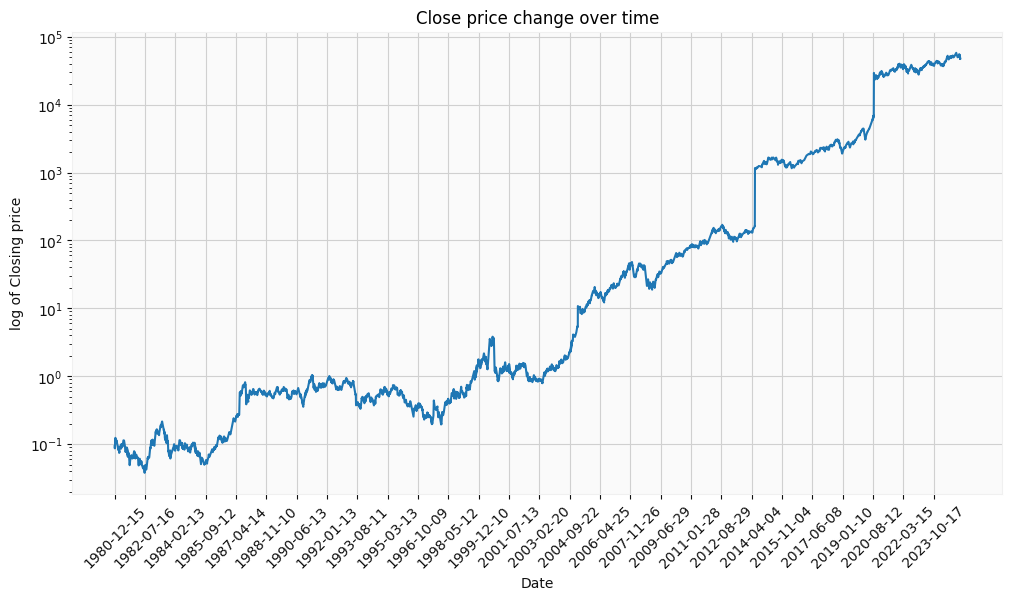

In [41]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'])
plt.xticks(data['date'][::400], rotation=45)  # to clearly view xlabels
plt.ylabel("log of Closing price")
plt.xlabel("Date")
plt.yscale("log")
plt.show()

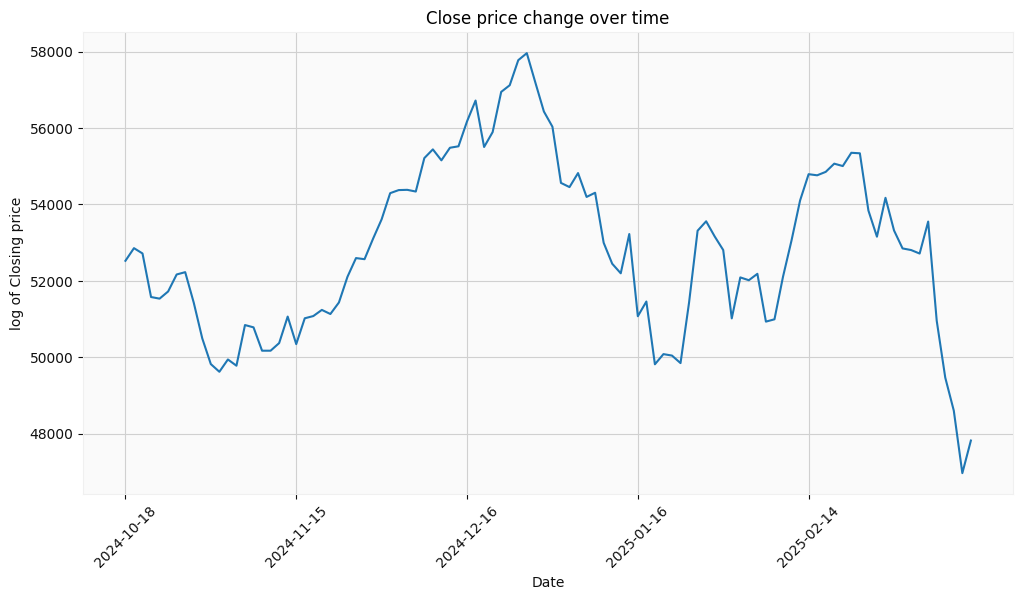

In [42]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'])
plt.xticks(df['date'][::20], rotation=45)  # to clearly view xlabels
plt.ylabel("log of Closing price")
plt.xlabel("Date")
plt.show()

##### **Difference between Ajusted close price and close price**

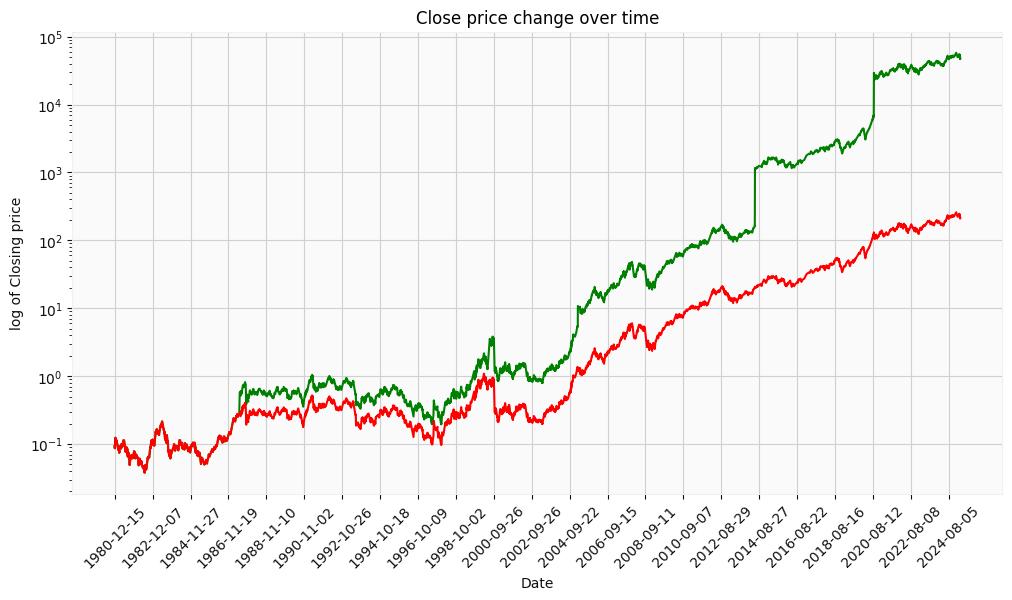

In [43]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'green')
plt.plot(data['date'], data['close'], color = 'red')
plt.xticks(data.index[::500], rotation=45)  # to clearly view xlabels
plt.ylabel("log of Closing price")
plt.xlabel("Date")
plt.yscale("log") # used to scale the values
plt.show()

##### **Plot the OHLC graph**
This graph shows the relation between Open, High, Low and Close features

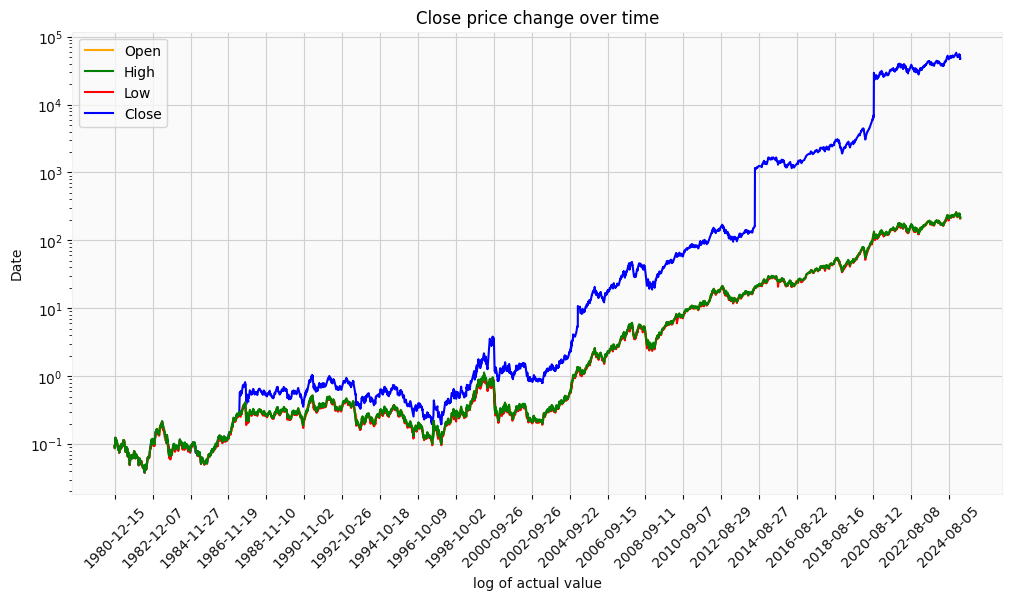

In [44]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'blue')
plt.plot(data['date'], data['open'], color = 'orange')
plt.plot(data['date'], data['low'], color = 'red')
plt.plot(data['date'], data['high'], color = 'green')
plt.xticks(data.index[::500], rotation=45)  # to clearly view xlabels
plt.xlabel("log of actual value")
plt.ylabel("Date")
plt.yscale("log") # used to scale the values
ohlc_legend = [
    plt.Line2D([0], [0], color='orange', label='Open'),
    plt.Line2D([0], [0], color='green', label='High'),
    plt.Line2D([0], [0], color='red', label='Low'),
    plt.Line2D([0], [0], color='blue', label='Close')
]
plt.legend(handles = ohlc_legend)
plt.show()

##### **Use candlestick pattern to see the trend in data**
Candle stick is the best plot to predict the trends in Stock prices. The candles helps in finding weather the price will go up or down.

In [45]:
# MLPfinance needs Close and date (datetime64[ns]) columns to plot
mp = df.set_index('date')
mp['Close'] = mp['adj_close']
mp.index = mp.index.astype("datetime64[ns]")

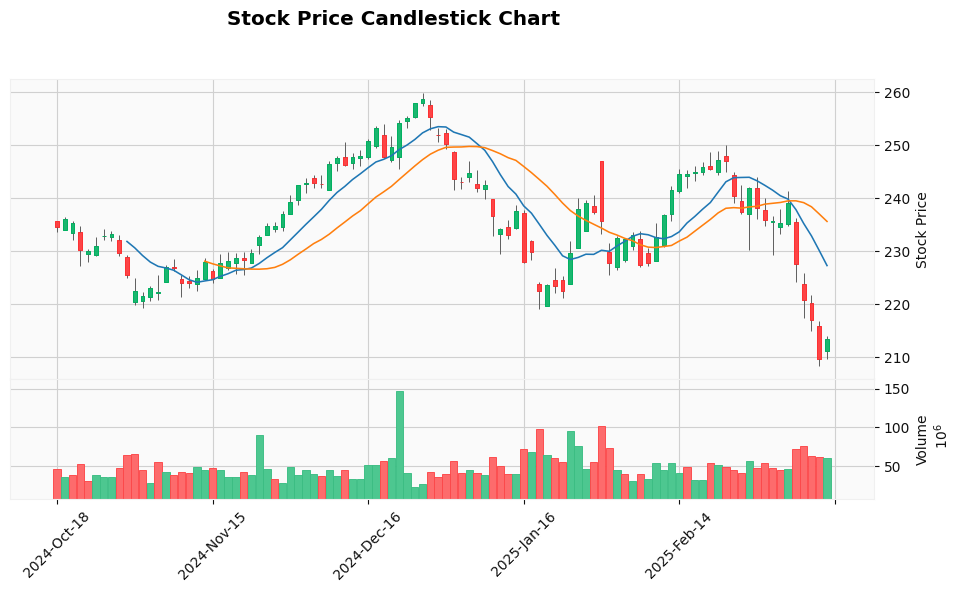

In [46]:
mpl.plot(mp,
         type="candle", 
         style="yahoo",  # Styles: classic, charles, yahoo, etc.
         title="Stock Price Candlestick Chart",
         ylabel="Stock Price",
         ylabel_lower="Volume",
         volume=True, 
         figsize=(12, 6), 
         mav=(10, 20),  # Moving averages (10-day & 20-day)
         show_nontrading=False)

##### **Plot moving averages as trend**
Moving average shows the average of values in a particular interval. Calculating all the moving averages gives you the trend of the series

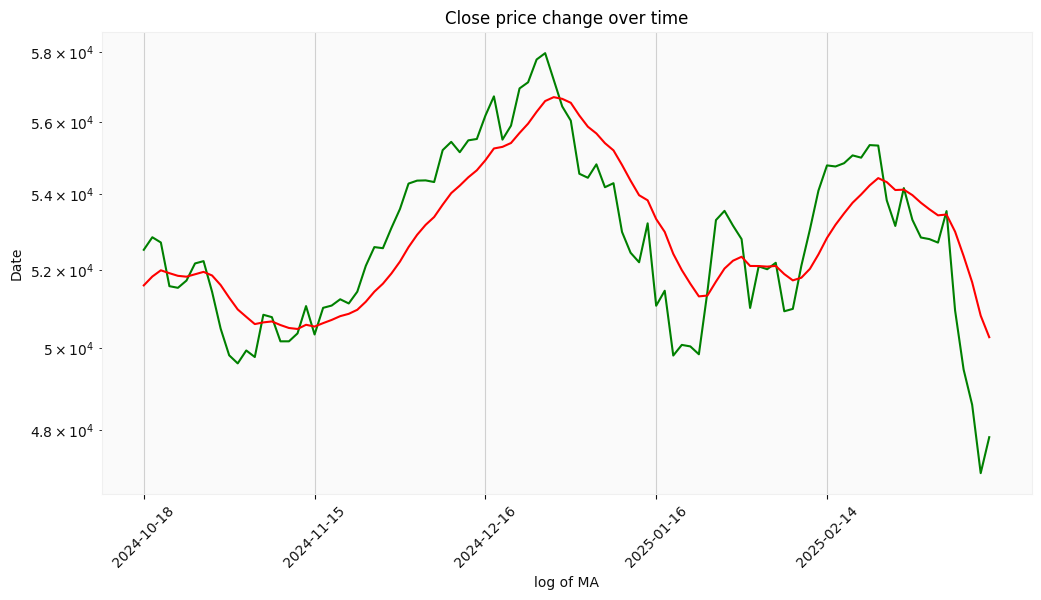

In [47]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'], color = 'green')
plt.plot(df['date'], df['rolling_ma'], color = 'red')
plt.xticks(df['date'][::20], rotation=45) 
plt.xlabel("log of MA")
plt.ylabel("Date")
plt.yscale("log")
plt.show()

##### **Bollinger Band** 
- It is used to view if a price has volatility and potential reversals
- The gray region shown by upper and lower bond gives the bollinger band
- If the price goes above the upper band it may soon fall
- If the price goes below the lower band it may soon raise
- If the band widens, there is high volatility
- If the band narrows, there is low volatility

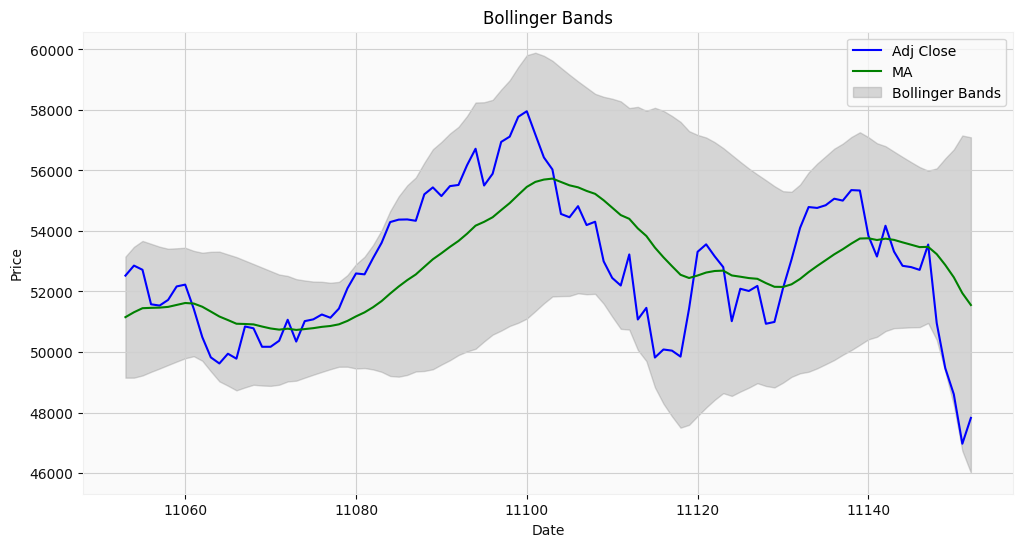

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["adj_close"], label="Adj Close", color="blue")
plt.plot(df.index, df["SMA_20"], label="MA", color="green")
plt.fill_between(df.index, df["upper_band"], df["lower_band"], color="gray", alpha=0.3, label="Bollinger Bands")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Bands")
plt.legend()
plt.show()

##### **RSI** 
- RSI helps to view overbought and oversold 
- RSI indicates the momentum of the price change
- It acts as a ocsillator, where it gets back to center when reaching extreme ends
- When RSI > 70, it indicates the overbought condition and the price may fall
- When RSI < 30, it indicates the oversold condition and the price may rise

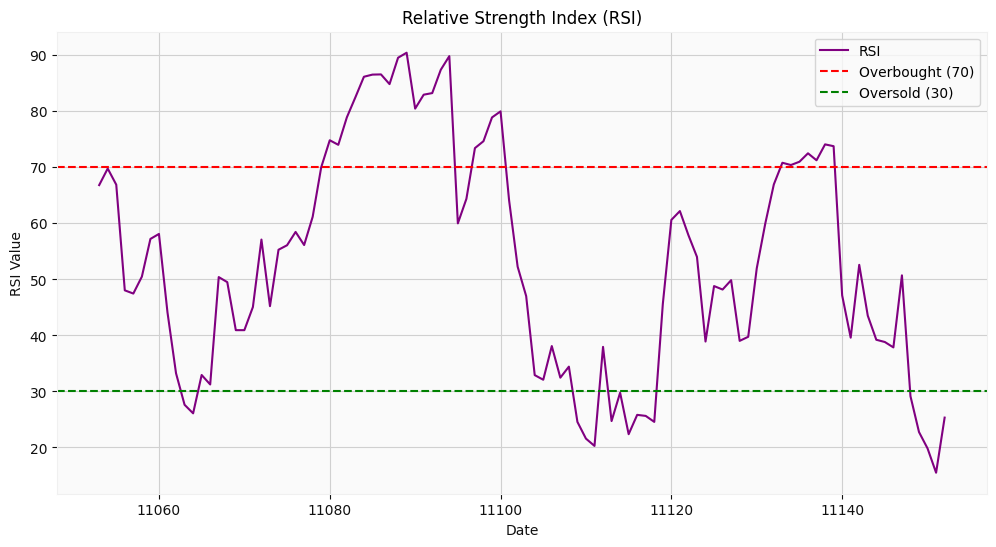

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="--", color="red", label="Overbought (70)")
plt.axhline(30, linestyle="--", color="green", label="Oversold (30)")

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

- Using Bollinger band along with RSI values is to assure that the buy or sell signal is accurate and there are no false signals.

##### **MACD** 
- MACD shows signal for buy and sell
- MACD is a long term momentum indicator, it indicates momentum along with trend
- The signal line is smoothen version of MACD
- When MACD crosses above the signal line, the trend is bullish (buy signal)
- When MACD crosses below the signal line, the trend is bearish (sell signal)
- MACD above Zero : Strong Uptrend (Look for buy signals)
- MACD below Zero : Strong Downtrend (Look for sell signals)

- If MACD crosses above the Signal Line but is still below Zero, the uptrend may be weak

**Histogram Interpretation**
- The MACD Histogram (difference between MACD & Signal Line) helps visualize momentum:
- Histogram Bars Growing → Momentum increasing (Trend strengthening)
- Histogram Bars Shrinking → Momentum decreasing (Trend weakening)

- If MACD is above Signal Line & histogram is growing, it’s a strong buy signal.
- If MACD is below Signal Line & histogram is shrinking, it’s a strong sell signal.

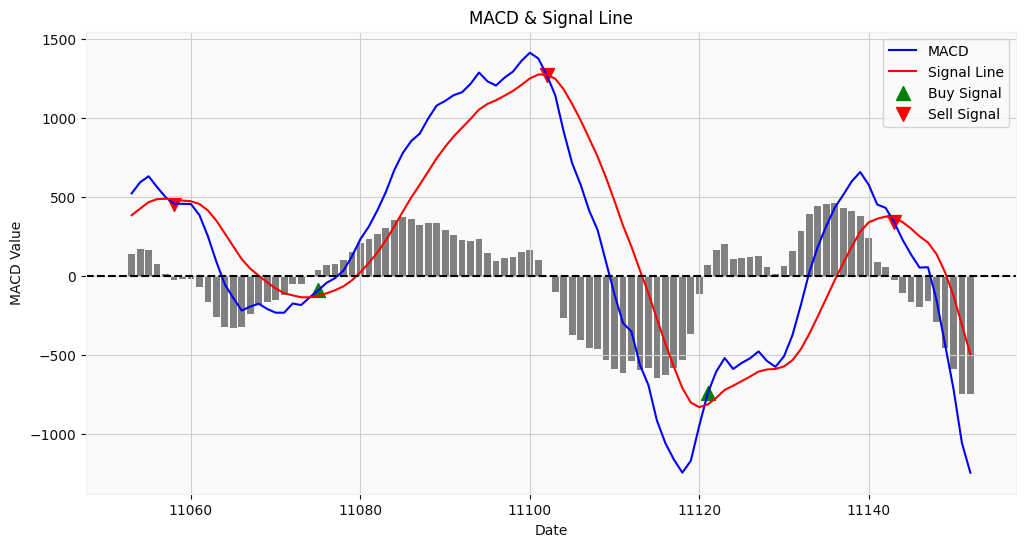

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["Signal_Line"], label="Signal Line", color="red")
plt.axhline(0, color="black", linestyle="--")

macd = df['MACD']
signal = df['Signal_Line']

# macd.shift(1) gives previous row value, if previous day macd value < signal value and today it crosses over then it is bullish
buy_signals = np.where((macd.shift(1) < signal.shift(1)) & (macd > signal), macd, np.nan)
# macd.shift(1) gives previous row value, if previous day macd value > signal value and today it crosses over then it is bearish
sell_signals = np.where((macd.shift(1) > signal.shift(1)) & (macd < signal), macd, np.nan)

plt.scatter(df.index, buy_signals, marker='^', color='green', label="Buy Signal", alpha=1, s=100)
plt.scatter(df.index, sell_signals, marker='v', color='red', label="Sell Signal", alpha=1, s=100)

plt.bar(df.index, df['MACD_Histogram'], color='gray')

plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("MACD & Signal Line")
plt.legend()
plt.show()


- We use both sine and cosine together in Fourier features because they complement each other and ensure that the model captures all possible phase shifts in periodic patterns.
- If we only use sine, we might miss cycles that start at their peak (like cosine).
- If we only use cosine, we might miss cycles that start in the middle (like sine).

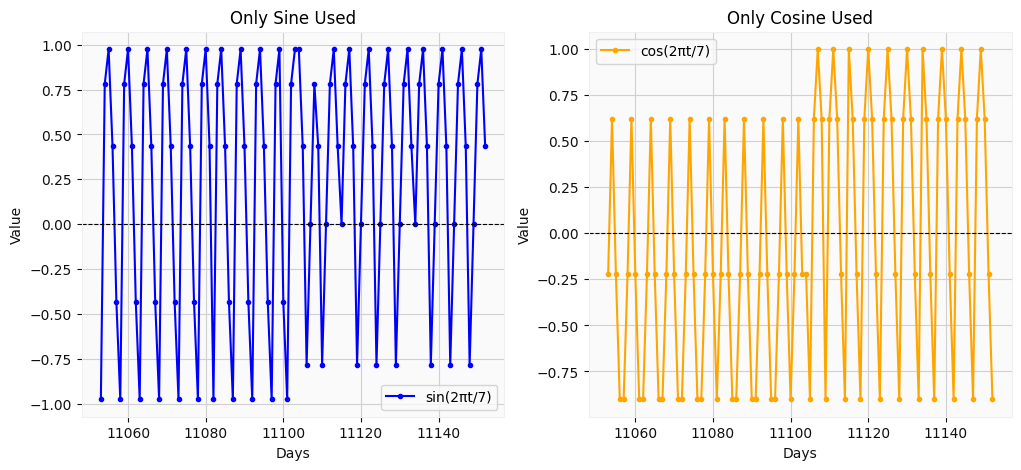

In [51]:
plt.figure(figsize=(12, 5))

# Plot only Sine
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Fourier_Sin_7'], label="sin(2πt/7)", color='blue', linestyle='-', marker='.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title("Only Sine Used")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Plot only Cosine
plt.subplot(1, 2, 2)
plt.plot(df.index, df['Fourier_Cos_7'], label="cos(2πt/7)", color='orange', linestyle='-', marker='.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title("Only Cosine Used")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.show()

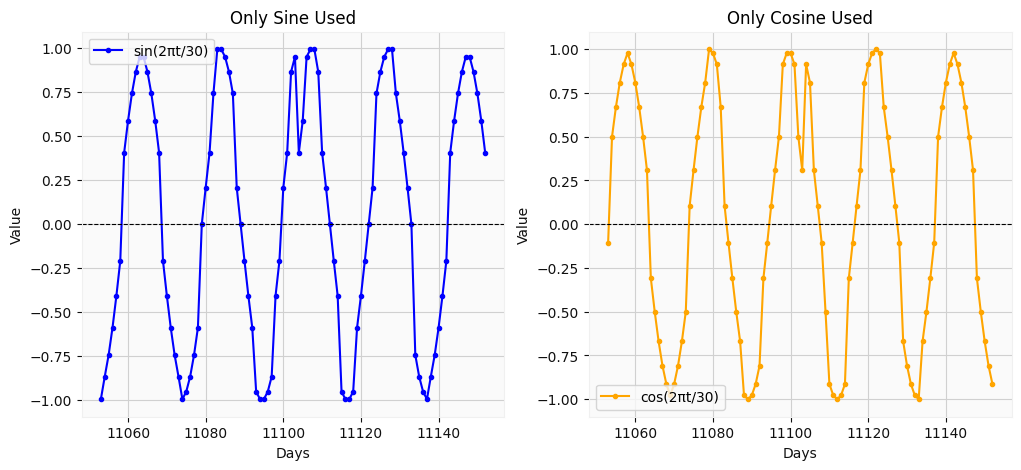

In [52]:
plt.figure(figsize=(12, 5))

# Plot only Sine
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Fourier_Sin_30'], label="sin(2πt/30)", color='blue', linestyle='-', marker='.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title("Only Sine Used")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Plot only Cosine
plt.subplot(1, 2, 2)
plt.plot(df.index, df['Fourier_Cos_30'], label="cos(2πt/30)", color='orange', linestyle='-', marker='.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title("Only Cosine Used")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.show()

##### **PCAF and ACF**
- These are useful to select the p,q values when AR or MA models are used and to select window size when LSTM model is used
- In PCAF the lag for which there is a sudden drop to 0 is selected as window size
- ACF shows the trend (seasonality) and the lag where it is droping and not much difference between neighboring lags can be selected

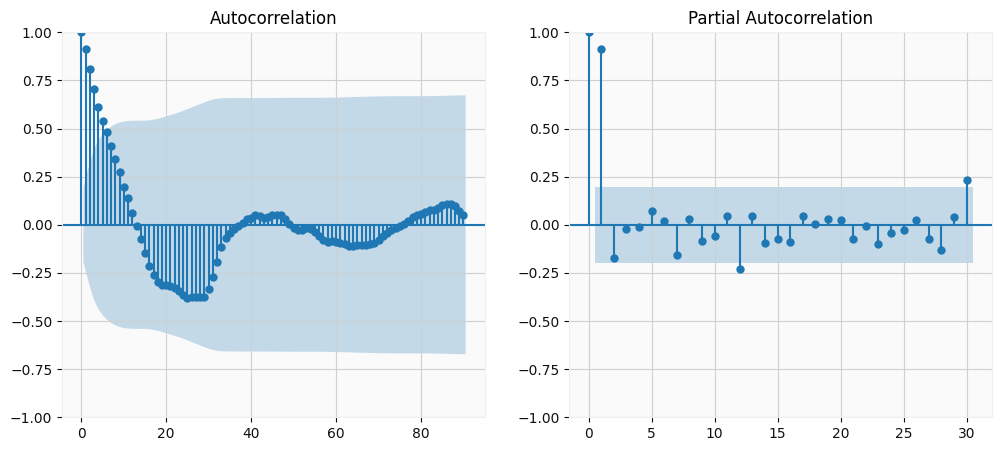

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df['adj_close'], lags = 90, ax = ax[0])
plot_pacf(df['adj_close'], lags = 30, ax = ax[1])

plt.show()

- Since there is slow decay, we may apply first order differencing and try.

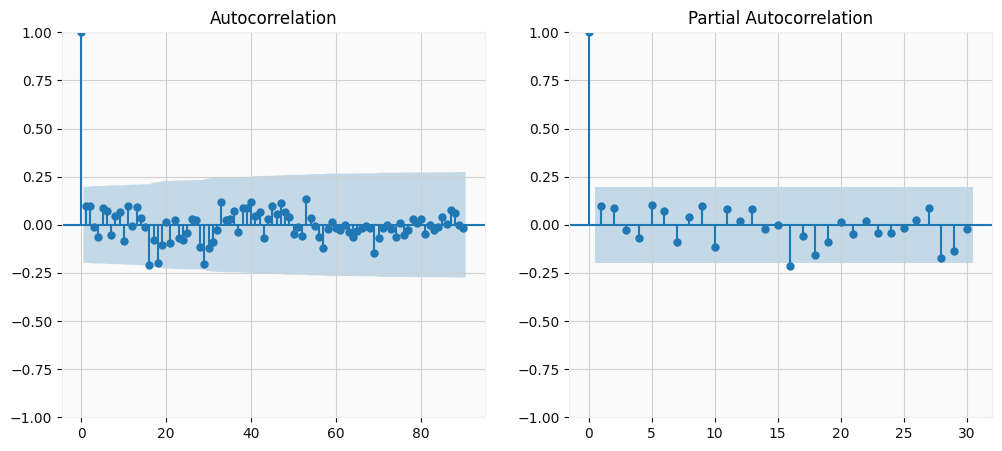

In [54]:
diff = df['adj_close'].diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(diff, lags = 90, ax = ax[0])
plot_pacf(diff, lags = 30, ax = ax[1])
plt.show()

- Since the lags in PCAF drops at 3-5 lags we may select one of it as a window size
- Since the lags in ACF decays quickly at 3-5 lags, selecting this window is reasonable
- If the decay in the lags of ACF is slow (taking more number of lags) then we must take a longer window size

In [55]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adj_close',
       'rolling_ma', 'RSI', 'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA_20',
       'upper_band', 'lower_band', 'year', 'month', 'day', 'weekday',
       'Fourier_Sin_7', 'Fourier_Cos_7', 'Fourier_Sin_30', 'Fourier_Cos_30'],
      dtype='object')

In [56]:
df2 = data.drop(columns=['close'])

In [57]:
df2.head()

,date,high,low,open,volume,adj_close,rolling_ma,RSI,MACD,Signal_Line,...,upper_band,lower_band,year,month,day,weekday,Fourier_Sin_7,Fourier_Cos_7,Fourier_Sin_30,Fourier_Cos_30
0,1980-12-15,0.094005,0.093575,0.094005,175884800,0.093575,0.097789,0.000000,-0.000411,-0.000082,...,0.105519,0.090951,1980,12,15,0,-5.487903e-14,1.000000,-0.866025,-0.500000
1,1980-12-16,0.087136,0.086707,0.087136,105728000,0.086707,0.095774,0.000000,-0.001276,-0.000321,...,0.110273,0.084001,1980,12,16,1,7.818315e-01,0.623490,-0.951057,-0.309017
2,1980-12-17,0.089282,0.088853,0.088853,86441600,0.088853,0.094516,17.933108,-0.001768,-0.000610,...,0.109358,0.083339,1980,12,17,2,9.749279e-01,-0.222521,-0.994522,-0.104528
3,1980-12-18,0.091858,0.091429,0.091429,73449600,0.091429,0.093955,34.260880,-0.001928,-0.000874,...,0.107771,0.083989,1980,12,18,3,4.338837e-01,-0.900969,-0.994522,0.104528
4,1980-12-19,0.097438,0.097009,0.097009,48630400,0.097009,0.094510,56.093613,-0.001586,-0.001016,...,0.106579,0.085396,1980,12,19,4,-4.338837e-01,-0.900969,-0.951057,0.309017


##### **Heatmap**
- This plot shows the relation between the features with each other
- This helps us in selecting relevant features for model training

In [58]:
corr = df2.drop(columns = 'date').corr()

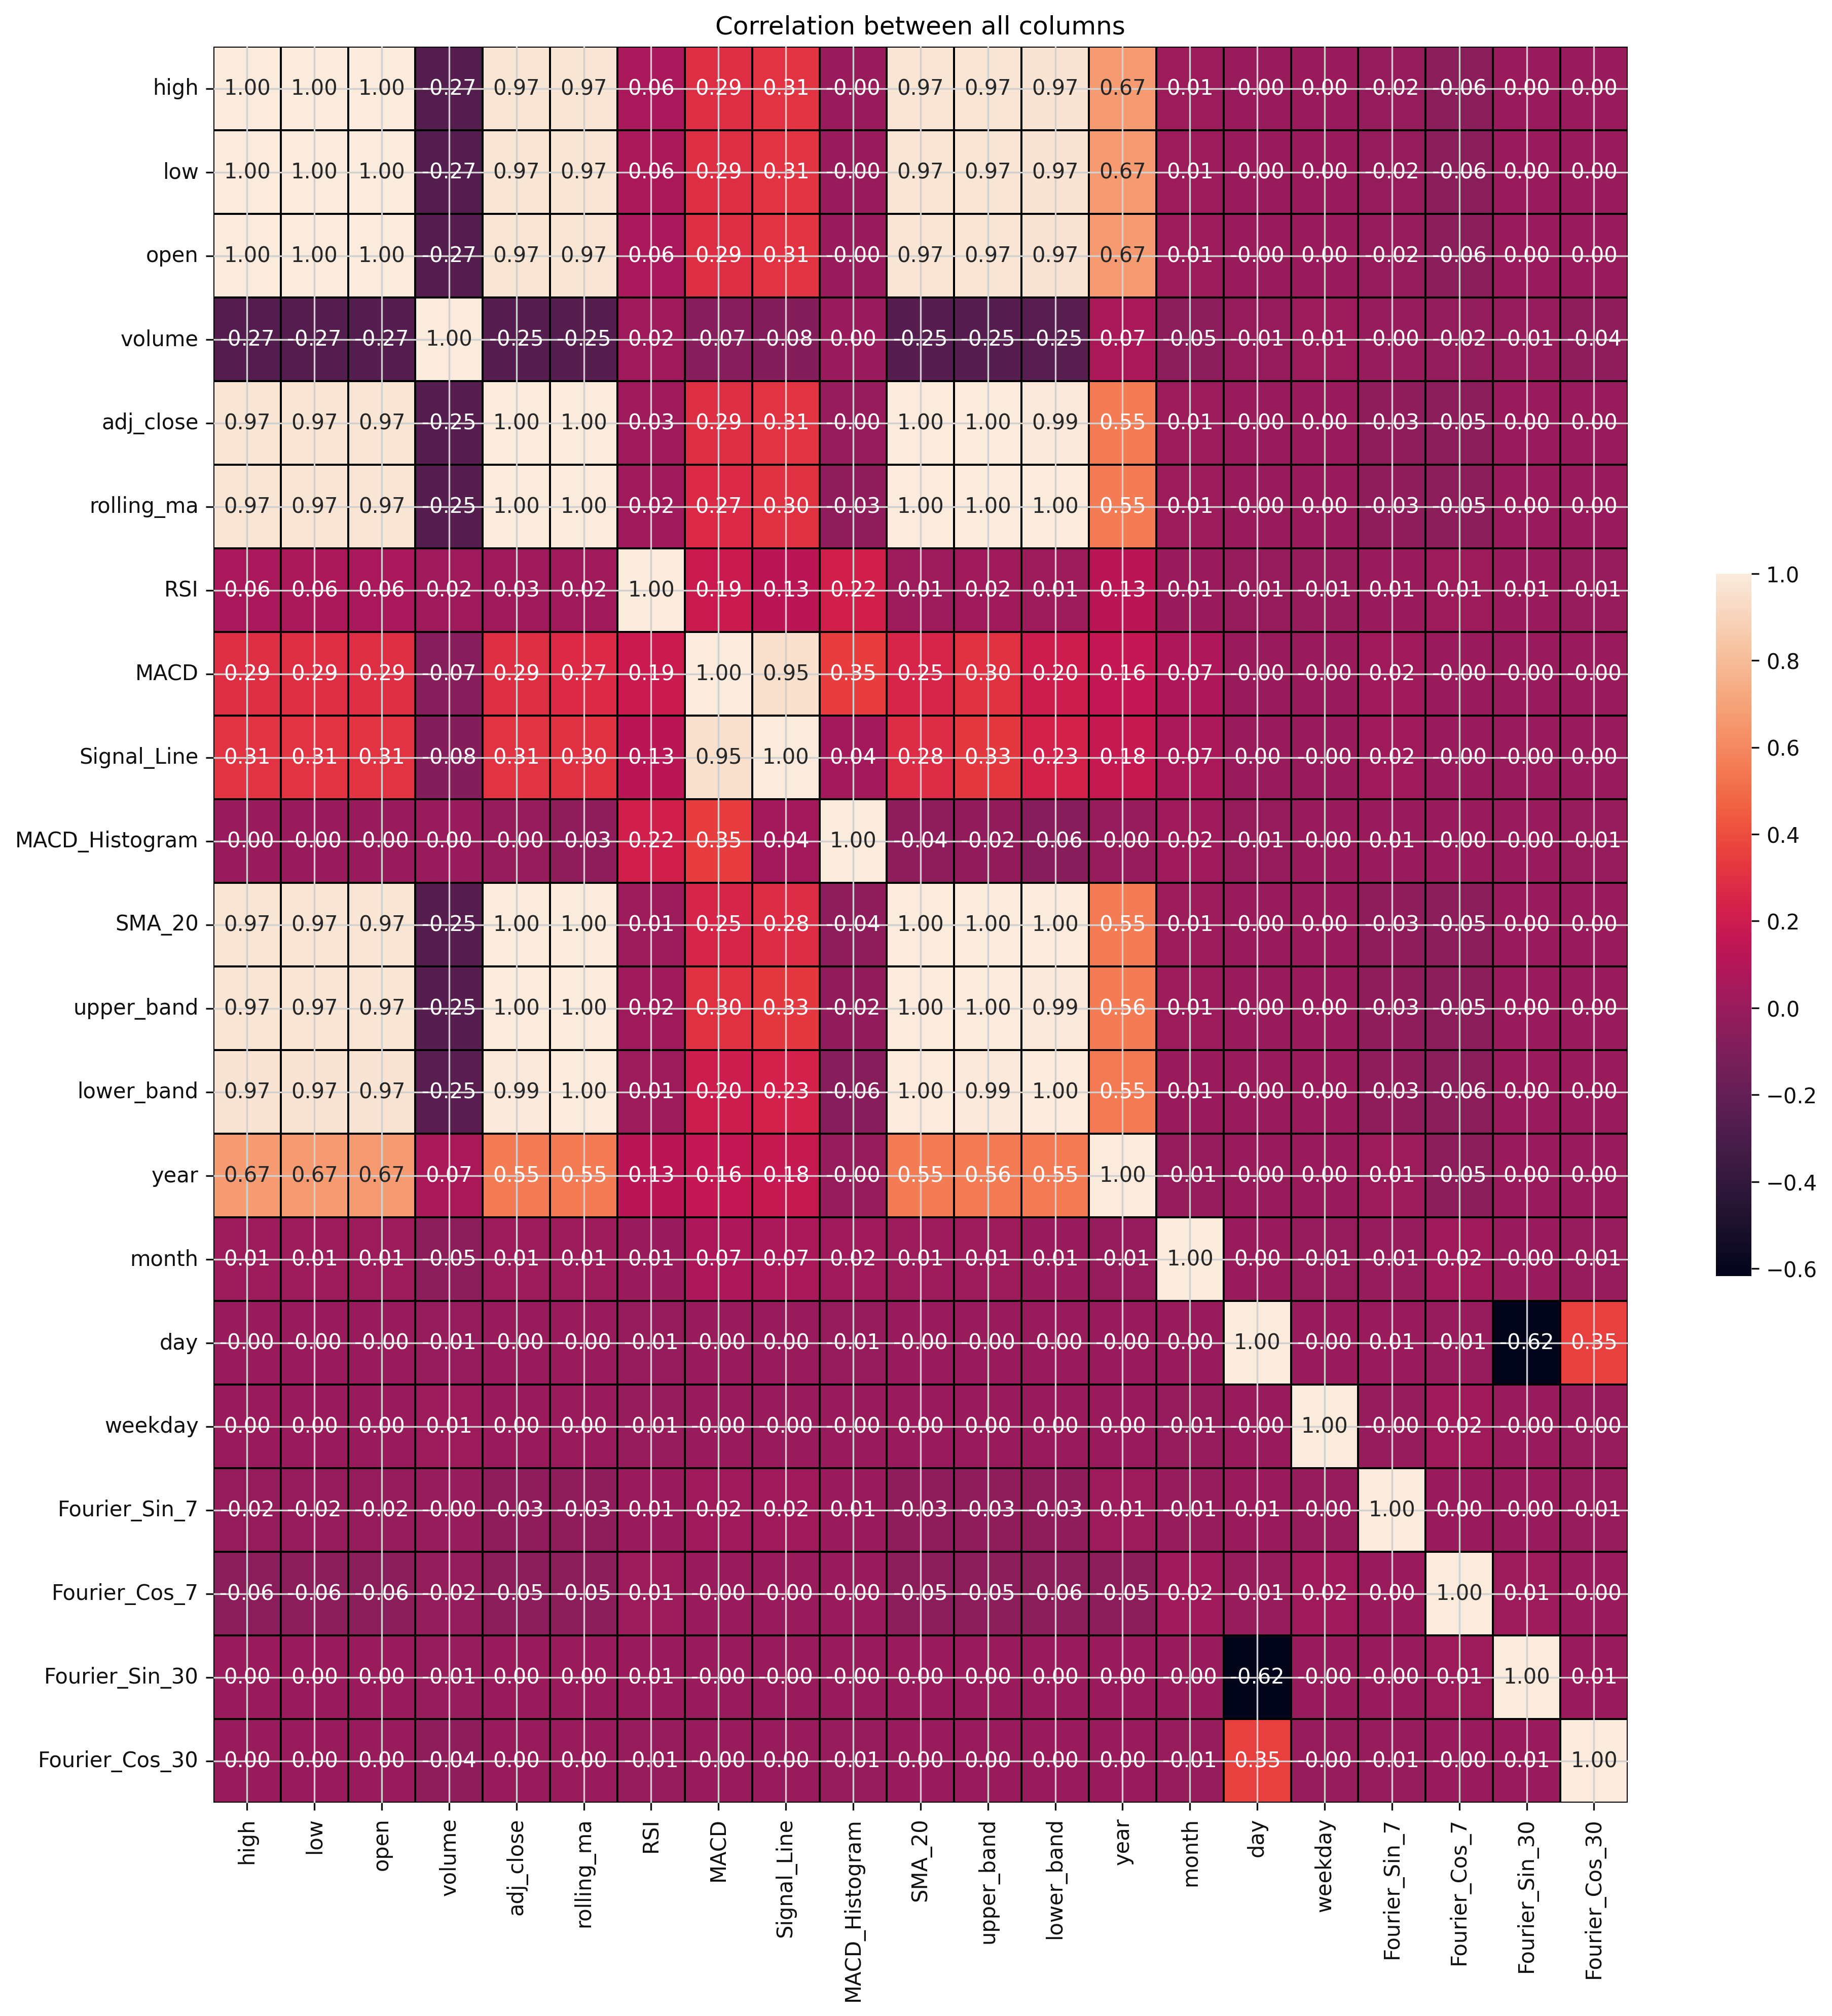

In [59]:
plt.figure(figsize=(15, 15), dpi=300)

plt.title("Correlation between all columns")

sns.heatmap(data = corr, linecolor="black", cbar=True, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.4})

plt.show()

In [60]:
scaler = StandardScaler()
scaled_df = df2.drop(columns='date').copy()
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df)

In [61]:
corr = scaled_df.corr()

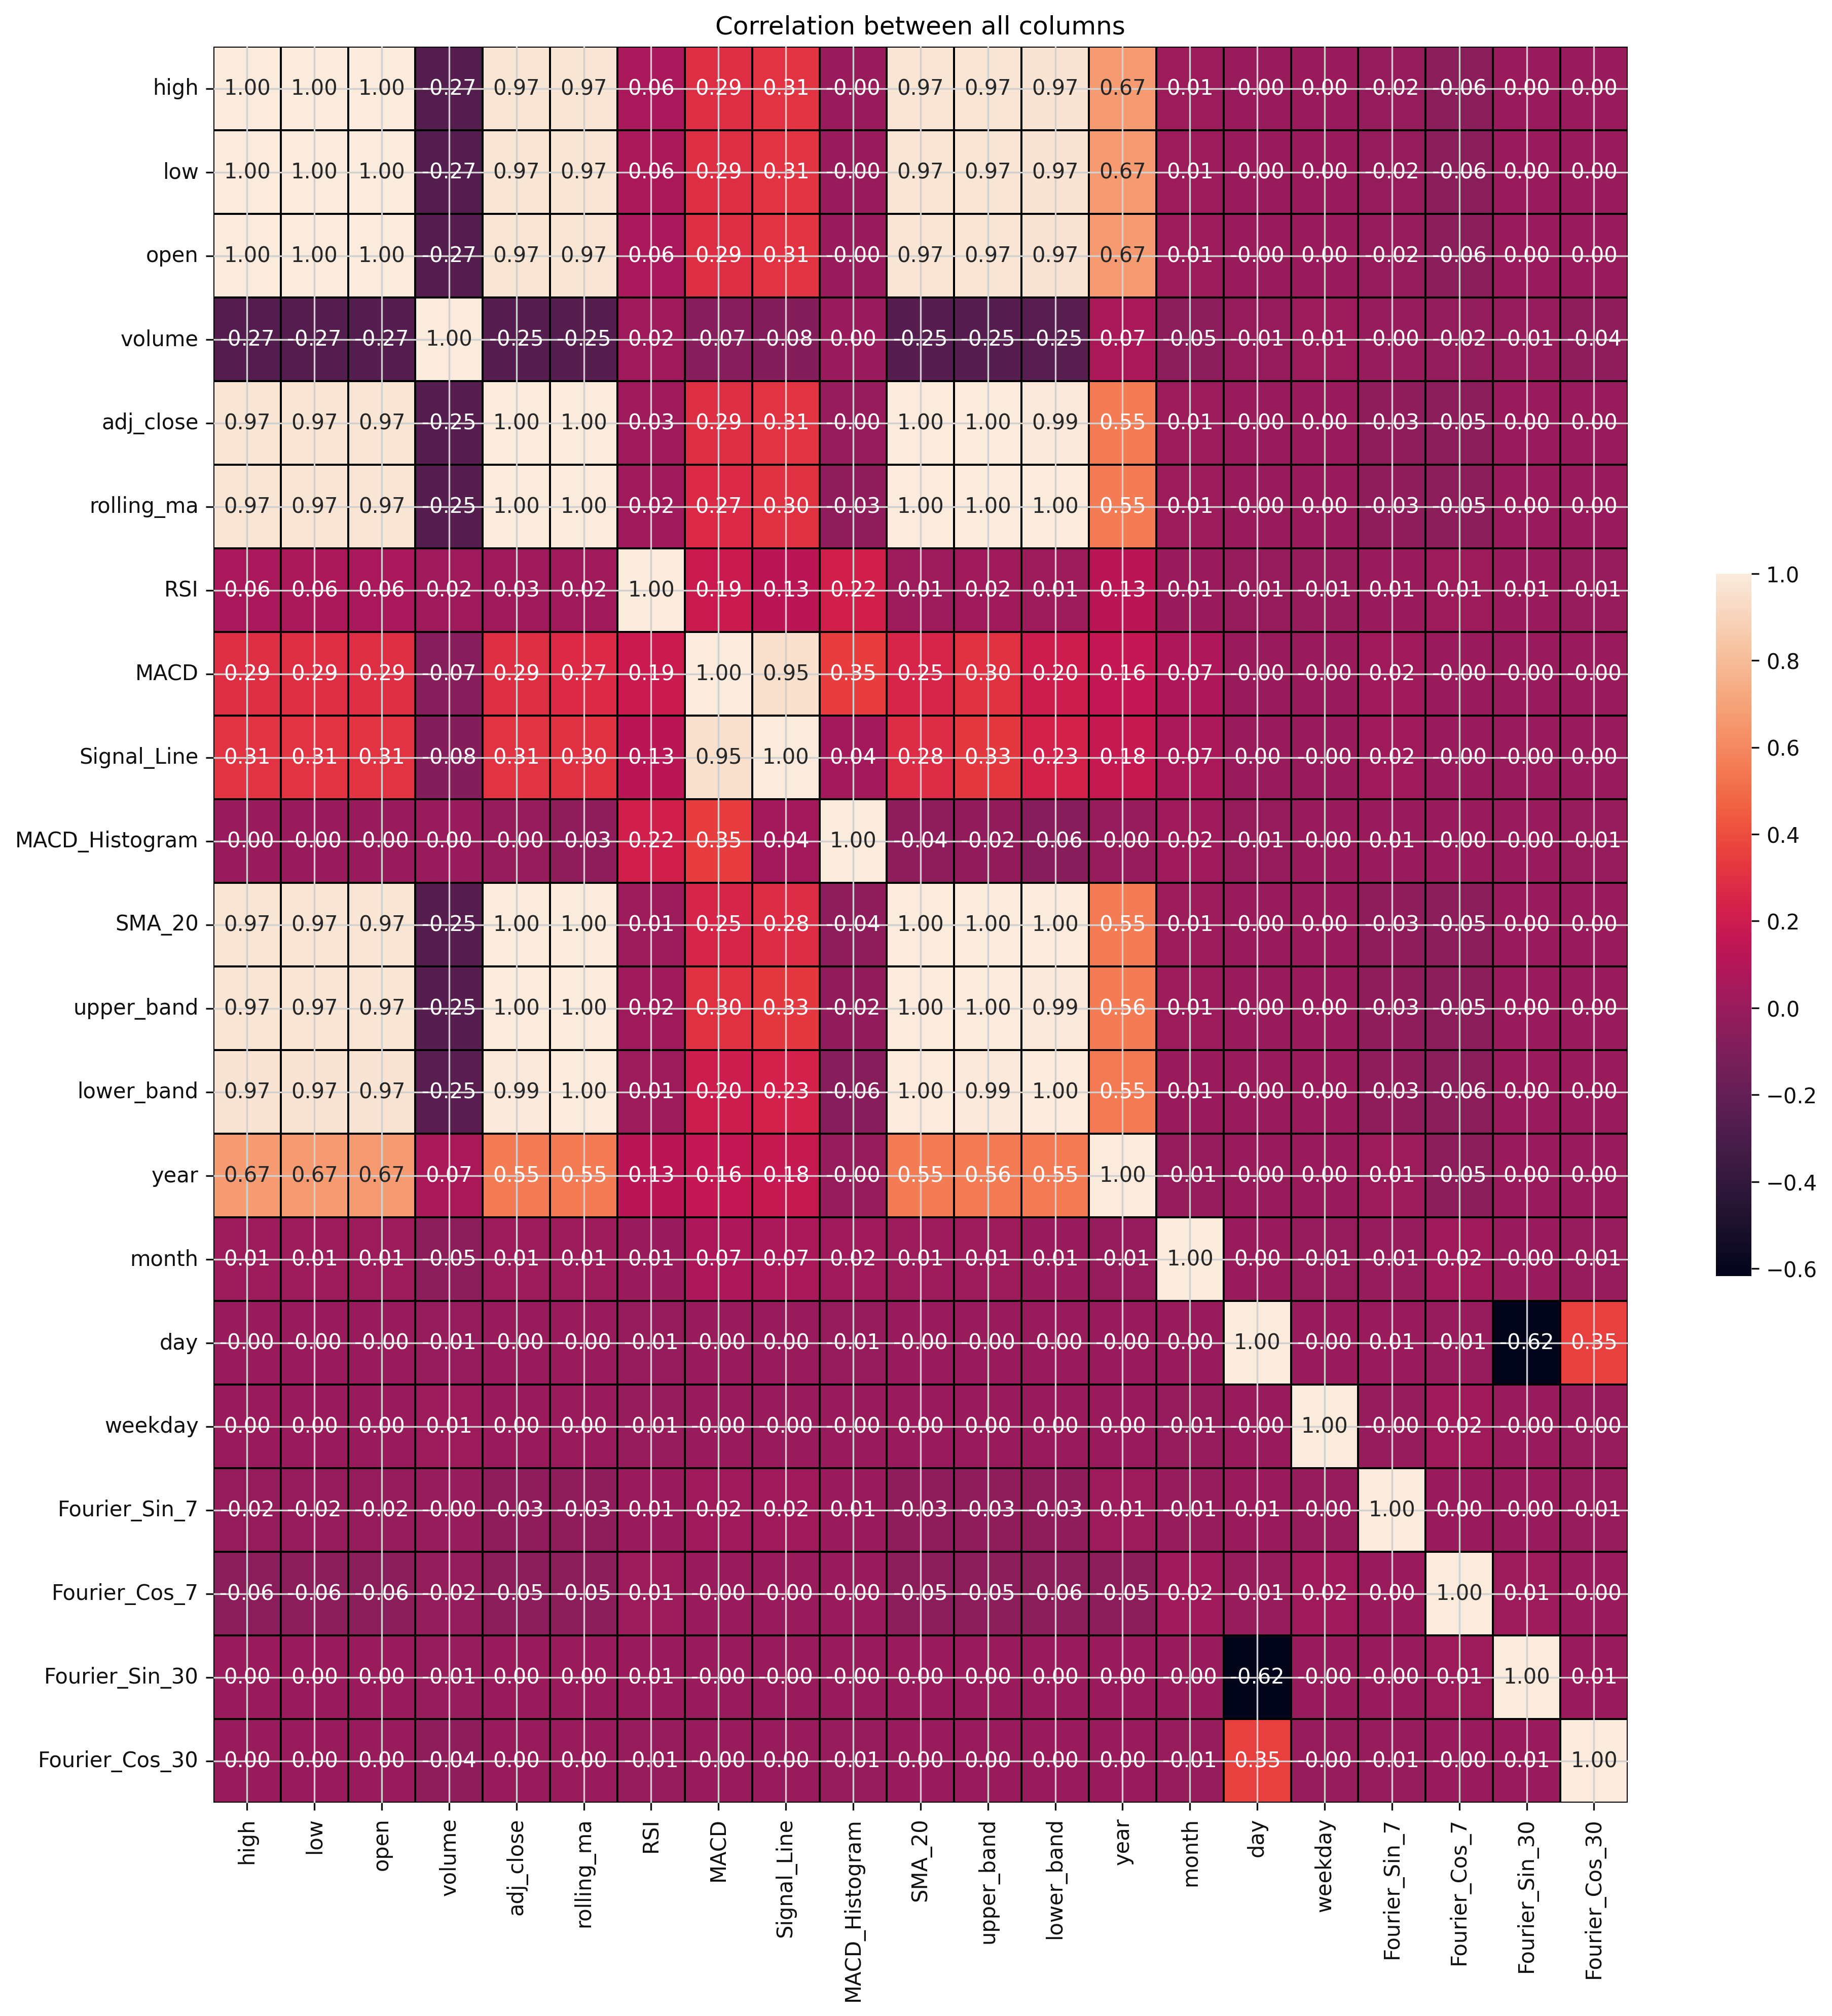

In [62]:
plt.figure(figsize=(15, 15), dpi=300)

plt.title("Correlation between all columns")

sns.heatmap(data = corr, linecolor="black", cbar=True, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.4})

plt.show()

##### **Observations**
- The features OPEN, LOW, HIGH are highly correlated with each other and also with adj_close,
So using only one of this feature might be useful than using all of them together.
- From the above reason cosidering OPEN feature out of them might be relevant.
- Volume doesn't impact much on the output column, so for now keep it on hold.
- rolling_ma is highly related with output column, so consider it.
- RSI doesn't have much correlation but still we can use this as it may be usefull along with other features like bollinger bands
- MACD, signal_line, MACD_histogram together effects the outcome.
- Lower_band, upper_band, SMA_20 together effects the outcome as a bollinger band.

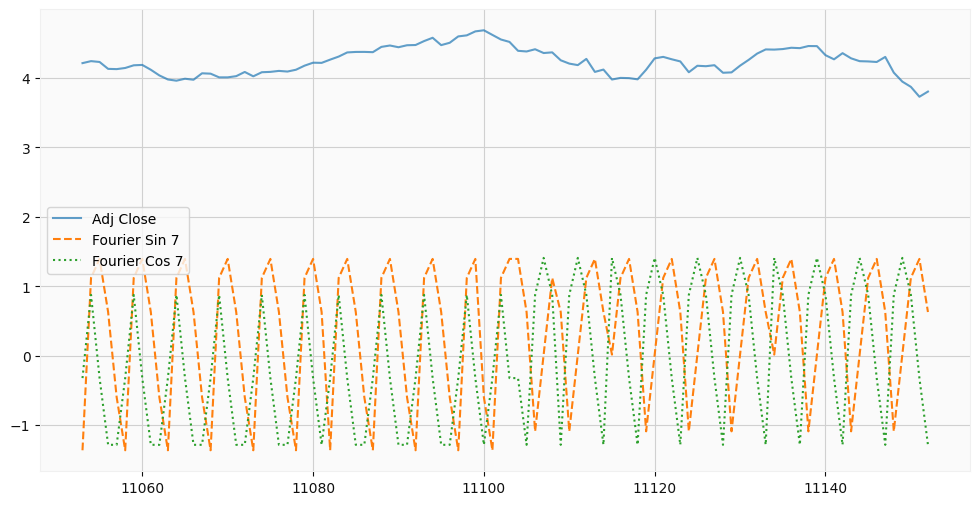

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_df["adj_close"][-100:], label="Adj Close", alpha=0.7)
plt.plot(scaled_df["Fourier_Sin_7"][-100:], label="Fourier Sin 7", linestyle="dashed")
plt.plot(scaled_df["Fourier_Cos_7"][-100:], label="Fourier Cos 7", linestyle="dotted")
plt.legend()
plt.show()


- We fail to capture any seasonality in the data hence the Fourier features may not be useful for prediction

<Axes: title={'center': 'Relation between close price and weekday'}, xlabel='month', ylabel='adj_close'>

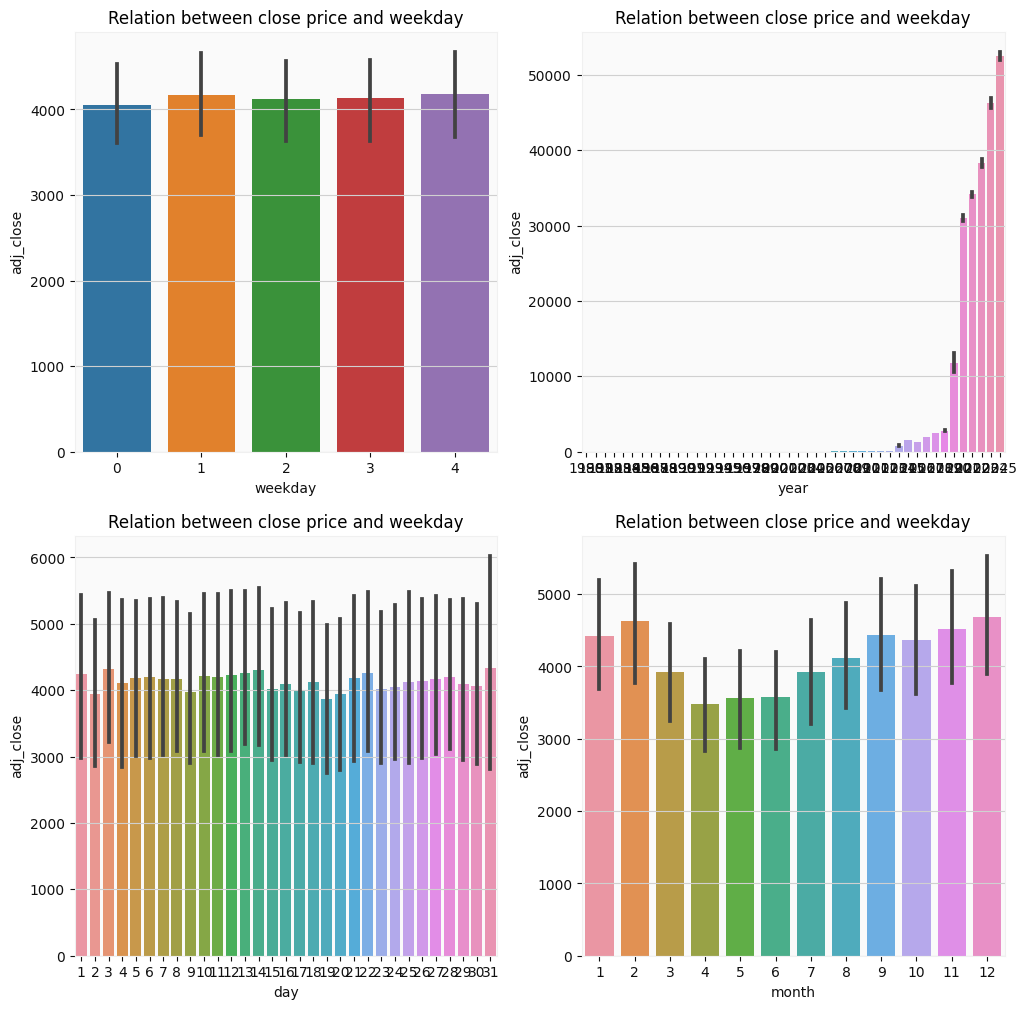

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))

ax[0, 0].set_title("Relation between close price and weekday")
sns.barplot(data = df2, x = 'weekday', y = 'adj_close', estimator='mean', ax = ax[0, 0])

ax[0, 1].set_title("Relation between close price and weekday")
sns.barplot(data = df2, x = 'year', y = 'adj_close', estimator='mean', ax = ax[0, 1])

ax[1, 0].set_title("Relation between close price and weekday")
sns.barplot(data = df2, x = 'day', y = 'adj_close', estimator='mean', ax = ax[1, 0])

ax[1, 1].set_title("Relation between close price and weekday")
sns.barplot(data = df2, x = 'month', y = 'adj_close', estimator='mean', ax = ax[1, 1])


- from the above observation we can say the date features show little or no relation with the output column, so lets not consider them for now

In [65]:
df2.columns

Index(['date', 'high', 'low', 'open', 'volume', 'adj_close', 'rolling_ma',
       'RSI', 'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA_20', 'upper_band',
       'lower_band', 'year', 'month', 'day', 'weekday', 'Fourier_Sin_7',
       'Fourier_Cos_7', 'Fourier_Sin_30', 'Fourier_Cos_30'],
      dtype='object')

In [66]:
df2.to_csv("Stocks3.csv", index=False)

In [67]:
df3 = df2.drop(columns = ['date', 'high', 'low', 'volume', 'month', 'year', 'day', 'weekday', 'Fourier_Sin_7', 'Fourier_Cos_7', 'Fourier_Sin_30', 'Fourier_Cos_30'])

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            11153 non-null  float64
 1   adj_close       11153 non-null  float64
 2   rolling_ma      11153 non-null  float64
 3   RSI             11153 non-null  float64
 4   MACD            11153 non-null  float64
 5   Signal_Line     11153 non-null  float64
 6   MACD_Histogram  11153 non-null  float64
 7   SMA_20          11153 non-null  float64
 8   upper_band      11153 non-null  float64
 9   lower_band      11153 non-null  float64
dtypes: float64(10)
memory usage: 871.5 KB


In [69]:
df3.to_csv("Stocks4.csv", index=False)